***Transition Visualization Notebook***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import fastparquet

sys.path.append('../')

from bout_machine import BoutMachine
from boutstr_machine import BoutStringMachine
import visualize.bout_vis as bout_vis
from FileCurtain import FileCurtain

%load_ext autoreload
%autoreload 2

In [2]:
groomFileCurtain = FileCurtain('/Users/brogab/Documents/JAXFell25/library/groom_pathlib.txt')
CSVsearchLogCurtain = FileCurtain('/Users/brogab/Documents/JAXFell25/library/CSVsearchLog_pathlib.txt')
PARQsearchLogCuratin = FileCurtain('/Users/brogab/Documents/JAXFell25/library/PARQsearchLog_pathlib.txt')

asd_bouts_fpath = groomFileCurtain.fpaths['ASD_bouts']
bxd_bouts_fpath = groomFileCurtain.fpaths['BXD_bouts']
jab_bouts_fpath = groomFileCurtain.fpaths['JAB_bouts']

In [55]:
trans_ref = {
    'cor_all': ['01', '12', '23', '34', '45', '56', '60'],
    'incor0': ['02', '03', '04', '05', '06'],
    'incor1': ['13', '14', '15', '16', '10'],
    'incor2': ['21', '24', '25', '26', '20'],
    'incor3': ['31', '32', '35', '36', '30'],
    'incor4': ['41', '42', '43', '46', '40'],
    'incor5': ['51', '52', '53', '54', '50'],
    'incor6': ['61', '62', '63', '64', '65']
}

strat_trans_ref = {
    'tran0': ['01', '02', '03', '04', '05', '06'],
    'tran1': ['10', '12', '13', '14', '15', '16'],
    'tran2': ['20', '21', '23', '24', '25', '26'],
    'tran3': ['30', '31', '32', '34', '35', '36'],
    'tran4': ['40', '41', '42', '43', '45', '46'],
    'tran5': ['50', '51', '52', '53', '54', '56'],
    'tran6': ['60', '61', '62', '63', '64', '65']
}

In [56]:
bxd25 = pd.read_csv(
    CSVsearchLogCurtain.fpaths['BXD25'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
    }
)
bxd25_strains = bxd25['strain'].unique()

print(bxd25.shape)
print(bxd25.dtypes)
print(bxd25_strains)

bxd25.head()

(7144, 9)
target                string[python]
match_num                      int64
interval                      object
bout_num                       int64
sex                   string[python]
strain                string[python]
duration                      object
video_search_index             int64
video_name            string[python]
dtype: object
<StringArray>
['BXD194/RwwJ', 'BXD214/RwwJ',  'BXD44/RwwJ',   'BXD31/TyJ',   'BXD19/TyJ',
 'BXD125/RwwJ']
Length: 6, dtype: string


,target,match_num,interval,bout_num,sex,strain,duration,video_search_index,video_name
0,12,1,"(34512, 34550)",23,M,BXD194/RwwJ,[21 17],0,/projects/kumar-lab/bxd-survey-dataset/unalign...
1,12,2,"(46612, 46759)",27,M,BXD194/RwwJ,[138 9],0,/projects/kumar-lab/bxd-survey-dataset/unalign...
2,12,3,"(47185, 47204)",27,M,BXD194/RwwJ,[ 8 11],0,/projects/kumar-lab/bxd-survey-dataset/unalign...
3,12,4,"(59846, 60015)",33,M,BXD194/RwwJ,[140 29],0,/projects/kumar-lab/bxd-survey-dataset/unalign...
4,12,5,"(70154, 70288)",38,M,BXD194/RwwJ,[87 47],0,/projects/kumar-lab/bxd-survey-dataset/unalign...


In [8]:
correct_trans_df = None
for idx, strain in enumerate(bxd25_strains):
    strain_slice = bxd25[bxd25['strain']==strain]
    #print(f'strain: {strain}, shape: {strain_slice.shape}')
    correct_trans_strain = {
        'strain': strain,
        #'total_trans': strain_slice.shape[0],
        '01': (strain_slice['target'] == '01').sum(),
        '12': (strain_slice['target'] == '12').sum(),
        '23': (strain_slice['target'] == '23').sum(),
        '34': (strain_slice['target'] == '34').sum(),
        '45': (strain_slice['target'] == '45').sum(),
        '56': (strain_slice['target'] == '56').sum(),
        '60': (strain_slice['target'] == '60').sum()
    }
    if idx == 0:
        correct_trans_df = pd.DataFrame([correct_trans_strain])
    else:
        correct_trans_df = pd.concat([correct_trans_df, pd.DataFrame([correct_trans_strain])], ignore_index=True)

incor_trans_df = None
for idx, strain in enumerate(bxd25_strains):
    strain_slice = bxd25[bxd25['strain']==strain]
    #print(f'strain: {strain}, shape: {strain_slice.shape}')
    incor_trans_strain = {
        'strain': strain,
        #'total_trans': strain_slice.shape[0],
        'incor0': (strain_slice['target'].isin(trans_ref['incor0'])).sum(),
        'incor1': (strain_slice['target'].isin(trans_ref['incor1'])).sum(),
        'incor2': (strain_slice['target'].isin(trans_ref['incor2'])).sum(),
        'incor3': (strain_slice['target'].isin(trans_ref['incor3'])).sum(),
        'incor4': (strain_slice['target'].isin(trans_ref['incor4'])).sum(),
        'incor5': (strain_slice['target'].isin(trans_ref['incor5'])).sum(),
        'incor6': (strain_slice['target'].isin(trans_ref['incor6'])).sum()
    }
    if idx == 0:
        incor_trans_df = pd.DataFrame([incor_trans_strain])
    else:
        incor_trans_df = pd.concat([incor_trans_df, pd.DataFrame([incor_trans_strain])], ignore_index=True)

In [9]:
cor_mat = correct_trans_df.iloc[:, 1:].to_numpy(dtype=np.int64)
incor_mat = incor_trans_df.iloc[:, 1:].to_numpy(dtype=np.int64)

per_cor_trans_mat = 100 * cor_mat / (cor_mat + incor_mat)

transitions = correct_trans_df.columns[1:]
strains = correct_trans_df['strain']

plot_df = pd.DataFrame(per_cor_trans_mat, columns=transitions).reset_index(names='strain')

plot_df = plot_df.melt(id_vars='strain', var_name='transition', value_name='percent_correct')

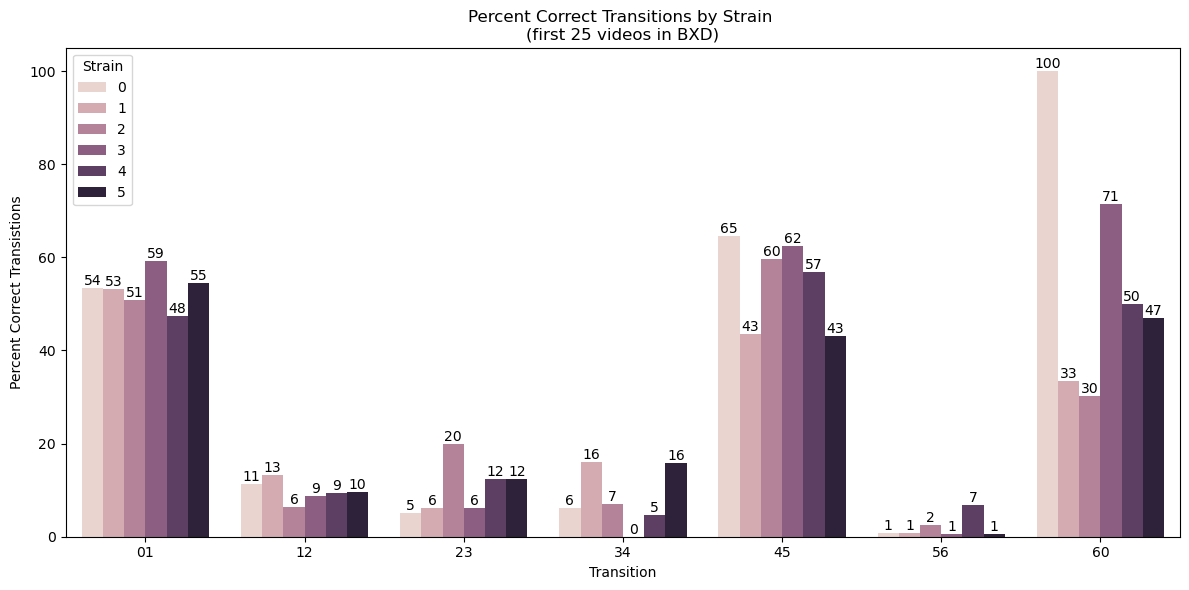

In [10]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
        data=plot_df,
        x='transition',
        y='percent_correct',
        hue='strain'
    )

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.0f',
        fontsize=10,
        #padding=0
    )

plt.ylabel('Percent Correct Transistions')
plt.xlabel('Transition')
plt.title('Percent Correct Transitions by Strain \n(first 25 videos in BXD)')
plt.legend(title='Strain')#, bbox_to_anchor=(1.05, 1))#, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
bxd50_keys = ['BXD50_tran0','BXD50_tran1','BXD50_tran2','BXD50_tran3','BXD50_tran4','BXD50_tran5','BXD50_tran6',]
bxd50 = {}

for idx, key in enumerate(bxd50_keys):
    bxd50[key] = pd.read_csv(
    CSVsearchLogCurtain.fpaths[key], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )

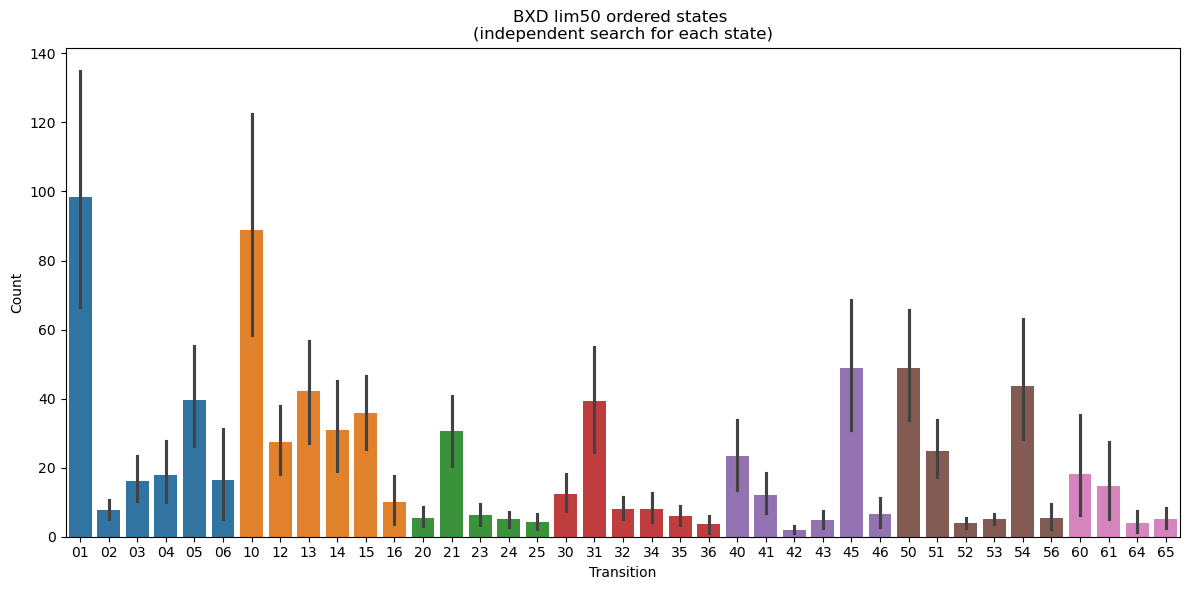

In [79]:
plt.figure(figsize=(12, 6))

for i, key in enumerate(bxd50_keys):

    count_df = (
        bxd50[key]
        .groupby(['target', 'strain'], observed=True)
        .size()
        .reset_index(name='count')
    )

    ax = sns.barplot(data=count_df, x='target', y='count')


plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('BXD lim50 ordered states \n(independent search for each state)')

plt.tight_layout()
plt.show()

In [ ]:
ASD100_fulltran_filt = pd.read_csv(
    CSVsearchLogCurtain.fpaths['ASD100_fulltran_filt'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )

BXD100_fulltran_filt = pd.read_csv(
    CSVsearchLogCurtain.fpaths['BXD100_fulltran_filt'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )

JABS100_fulltran_filt = pd.read_csv(
    CSVsearchLogCurtain.fpaths['JABS100_fulltran_filt'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )


In [ ]:
ASD100_fulltran_ord = pd.read_csv(
    CSVsearchLogCurtain.fpaths['ASD100_fulltran_ord'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )

BXD100_fulltran_ord = pd.read_csv(
    CSVsearchLogCurtain.fpaths['BXD100_fulltran_ord'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )

JABS100_fulltran_ord = pd.read_csv(
    CSVsearchLogCurtain.fpaths['JABS100_fulltran_ord'], dtype={
        "target": "string",
        "match_num": "int",
        #"interval": "tuple",
        "bout_num": "int",
        "sex": "string",
        "strain": "string",
        #"duration": "list",
        "video_search_index": "int",
        "video_name": "string"
        }
    )

In [51]:
# export parquet

'''save_dir = PARQsearchLogCuratin.fpaths['2_stage_transearch_parqdir']

ASD100_filt_return = ASD100_fulltran_filt.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
BXD100_filt_return = BXD100_fulltran_filt.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
JAB100_filt_return = JABS100_fulltran_filt.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

ASD100_ord_return = ASD100_fulltran_ord.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
BXD100_ord_return = BXD100_fulltran_ord.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
JAB100_ord_return = JABS100_fulltran_ord.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

ASD100_fulltran_filt.to_parquet(os.path.join(save_dir, 'ASD100_tran2_filt' + '.parquet'), index=False, engine='fastparquet')
BXD100_fulltran_filt.to_parquet(os.path.join(save_dir, 'BXD100_tran2_filt' + '.parquet'), index=False, engine='fastparquet')
JABS100_fulltran_filt.to_parquet(os.path.join(save_dir, 'JAB100_tran2_filt' + '.parquet'), index=False, engine='fastparquet')

ASD100_fulltran_ord.to_parquet(os.path.join(save_dir, 'ASD100_tran2_ord' + '.parquet'), index=False, engine='fastparquet')
BXD100_fulltran_ord.to_parquet(os.path.join(save_dir, 'BXD100_tran2_ord' + '.parquet'), index=False, engine='fastparquet')
JABS100_fulltran_ord.to_parquet(os.path.join(save_dir, 'JAB100_tran2_ord' + '.parquet'), index=False, engine='fastparquet')

save_dir'''


"save_dir = PARQsearchLogCuratin.fpaths['2_stage_transearch_parqdir']\n\nASD100_filt_return = ASD100_fulltran_filt.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)\nBXD100_filt_return = BXD100_fulltran_filt.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)\nJAB100_filt_return = JABS100_fulltran_filt.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)\n\nASD100_ord_return = ASD100_fulltran_ord.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)\nBXD100_ord_return = BXD100_fulltran_ord.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)\nJAB100_ord_return = JABS100_fulltran_ord.map(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)\n\nASD100_fulltran_filt.to_parquet(os.path.join(save_dir, 'ASD100_tran2_filt' + '.parquet'), index=False, engine='fastparquet')\nBXD100_fulltran_filt.to_parquet(os.path.join(save_dir, 'BXD100_tran2_filt' + '.parquet'), index=False, engine='fastparquet')\nJABS100_fulltran_filt.to_parquet(os.path.join

In [40]:
asd100_parq = pd.read_parquet(PARQsearchLogCuratin.fpaths['ASD100_fulltran_filt'], engine='fastparquet')

In [41]:
print(asd100_parq.dtypes)
asd100_parq.head()

target                 object
match_num               int64
match_interval         object
bout_num                int64
bout_interval          object
match_pos             float64
bout_pos              float64
duration               object
sex                    object
strain                 object
video_search_index      int64
video_name             object
dtype: object


,target,match_num,match_interval,bout_num,bout_interval,match_pos,bout_pos,duration,sex,strain,video_search_index,video_name
0,12,1,[4739 4981],1,[4739 4981],0.0438,0.0438,[239 3],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
1,12,2,[8216 8239],4,[7938 8481],0.0760,0.0734,[ 9 14],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
2,12,3,[20335 20393],11,[19868 20728],0.1880,0.1837,[43 15],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
3,12,4,[25332 25402],13,[24608 28162],0.2342,0.2275,[21 41 8],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
4,12,5,[25680 25718],13,[24608 28162],0.2374,0.2275,[19 19],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...


In [42]:
print(ASD100_fulltran_filt.dtypes)
ASD100_fulltran_filt.head(10)

target                string[python]
match_num                      int64
match_interval                object
bout_num                       int64
bout_interval                 object
match_pos                    float64
bout_pos                     float64
duration                      object
sex                   string[python]
strain                string[python]
video_search_index             int64
video_name            string[python]
dtype: object


,target,match_num,match_interval,bout_num,bout_interval,match_pos,bout_pos,duration,sex,strain,video_search_index,video_name
0,12,1,[4739 4981],1,[4739 4981],0.0438,0.0438,[239 3],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
1,12,2,[8216 8239],4,[7938 8481],0.0760,0.0734,[ 9 14],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
2,12,3,[20335 20393],11,[19868 20728],0.1880,0.1837,[43 15],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
3,12,4,[25332 25402],13,[24608 28162],0.2342,0.2275,[21 41 8],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
4,12,5,[25680 25718],13,[24608 28162],0.2374,0.2275,[19 19],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
5,12,6,[27189 27228],13,[24608 28162],0.2514,0.2275,[34 5],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
6,12,7,[44093 44142],19,[43716 44412],0.4077,0.4042,[40 9],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
7,12,8,[72277 72781],26,[72277 73341],0.6683,0.6683,[ 17 55 24 76 323 9],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
8,12,9,[74383 74584],28,[74017 77291],0.6878,0.6844,[ 10 123 9 38 21],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
9,12,10,[74885 74919],28,[74017 77291],0.6924,0.6844,[13 21],M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...


In [61]:
#print(ASD_lim100_fulltran[ASD_lim100_fulltran['target' == '62']].shape)
#print(ASD_lim100_fulltran[ASD_lim100_fulltran['target' == '63']].shape)
#ASD_lim100_fulltran['target' == '10']
ASD100_fulltran_filt[ASD100_fulltran_filt['target'] == '63'].shape

(8, 12)

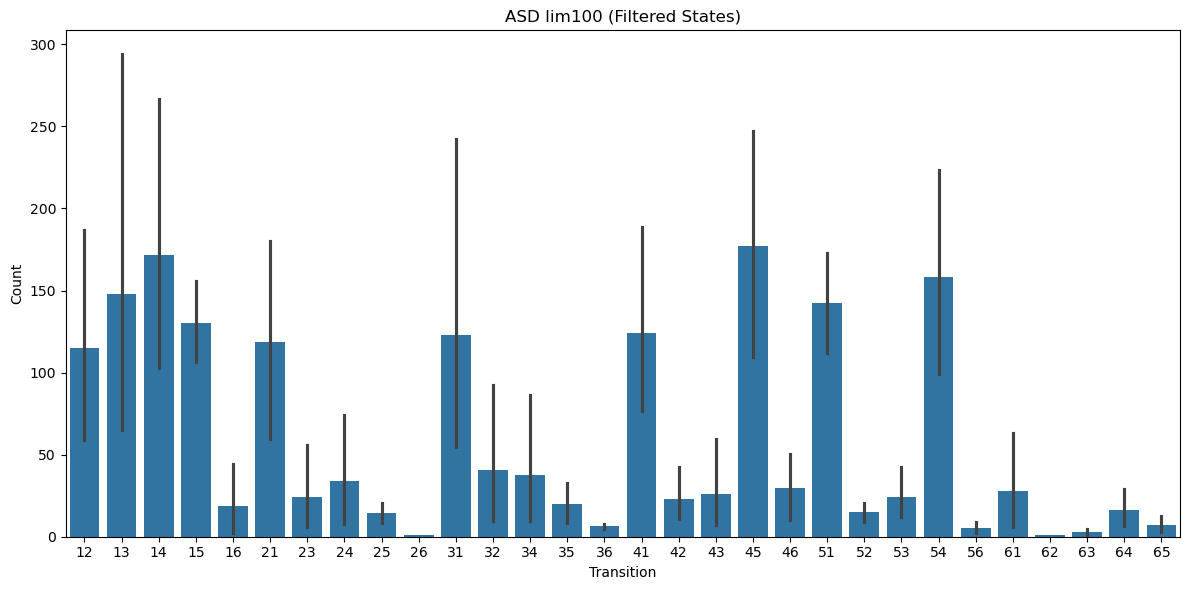

In [66]:
plt.figure(figsize=(12, 6))

asd_filt_count_df = (ASD100_fulltran_filt.groupby(['target', 'strain'], observed=True).size().reset_index(name='count'))

ax = sns.barplot(data=asd_filt_count_df, x='target', y='count')

plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('ASD lim100 (Filtered States)')

#plt.yticks(np.arange(0, 700, 50))

plt.tight_layout()
plt.show()

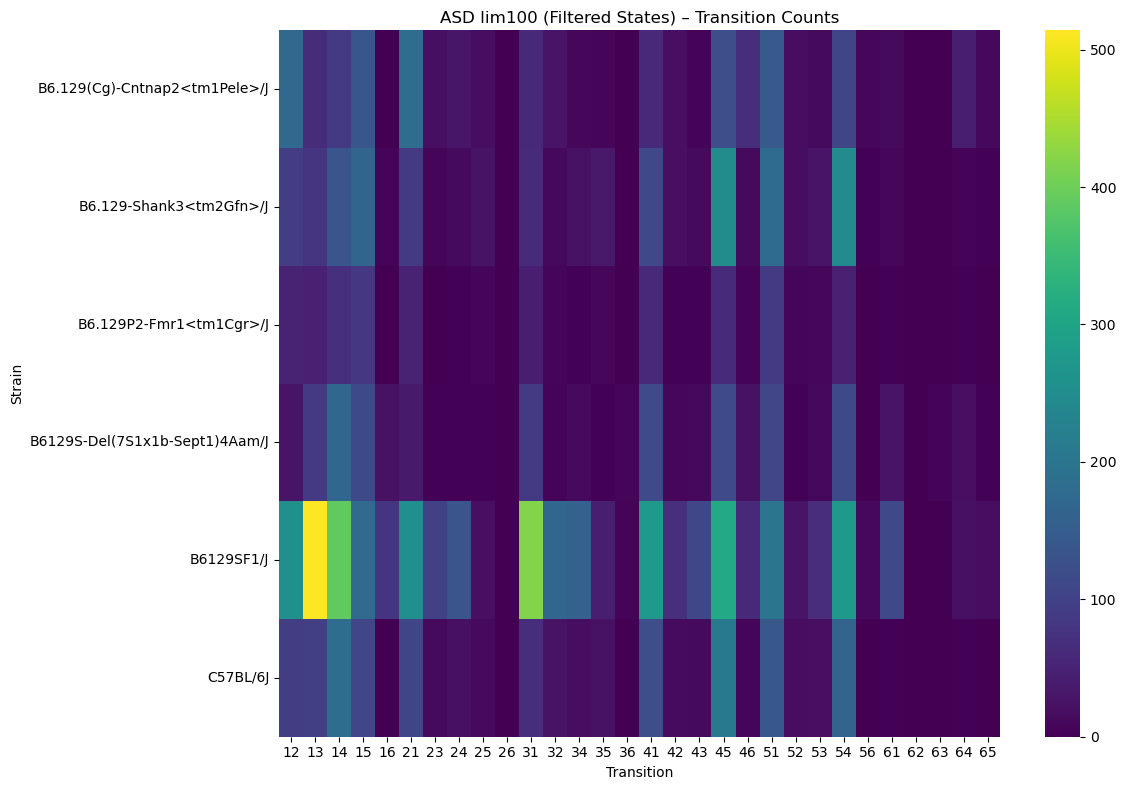

In [65]:
asd_heatmap_df = asd_filt_count_df.pivot(index='strain', columns='target', values='count').fillna(0)
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    asd_heatmap_df,
    cmap='viridis',
    #linewidths=0.5,
    #linecolor='white'
)

ax.set_xlabel('Transition')
ax.set_ylabel('Strain')
ax.set_title('ASD lim100 (Filtered States) – Transition Counts')

plt.tight_layout()
plt.show()

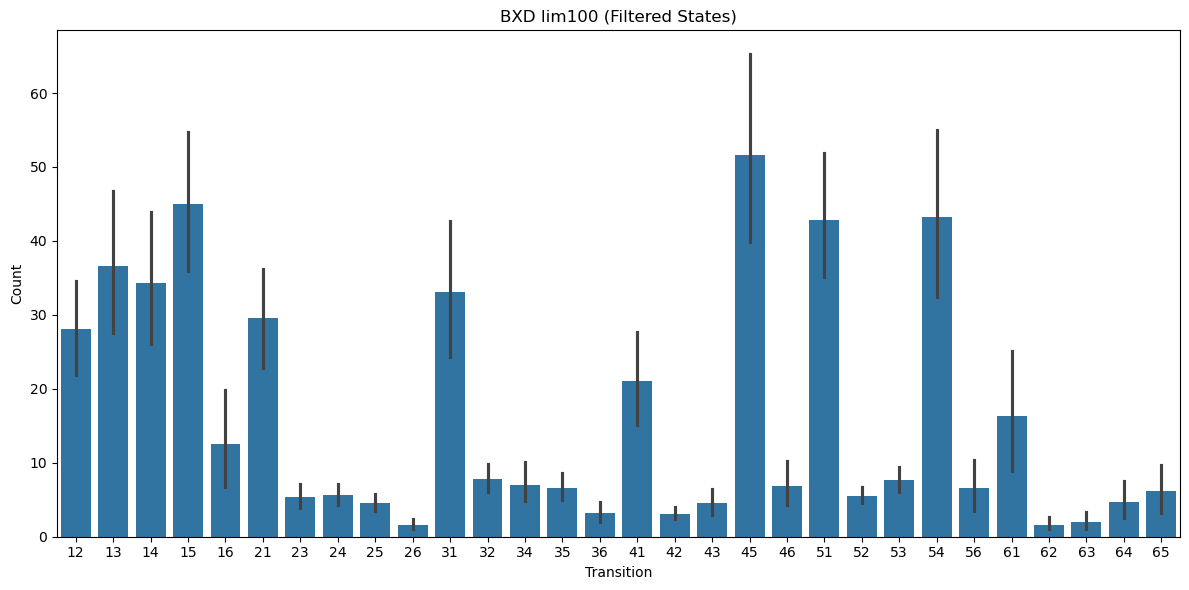

In [68]:
plt.figure(figsize=(12, 6))

bxd_filt_count_df = (BXD100_fulltran_filt.groupby(['target', 'strain'], observed=True).size().reset_index(name='count'))

ax = sns.barplot(data=bxd_filt_count_df, x='target', y='count')

plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('BXD lim100 (Filtered States)')

#plt.yticks(np.arange(0, 150, 10))

plt.tight_layout()
plt.show()

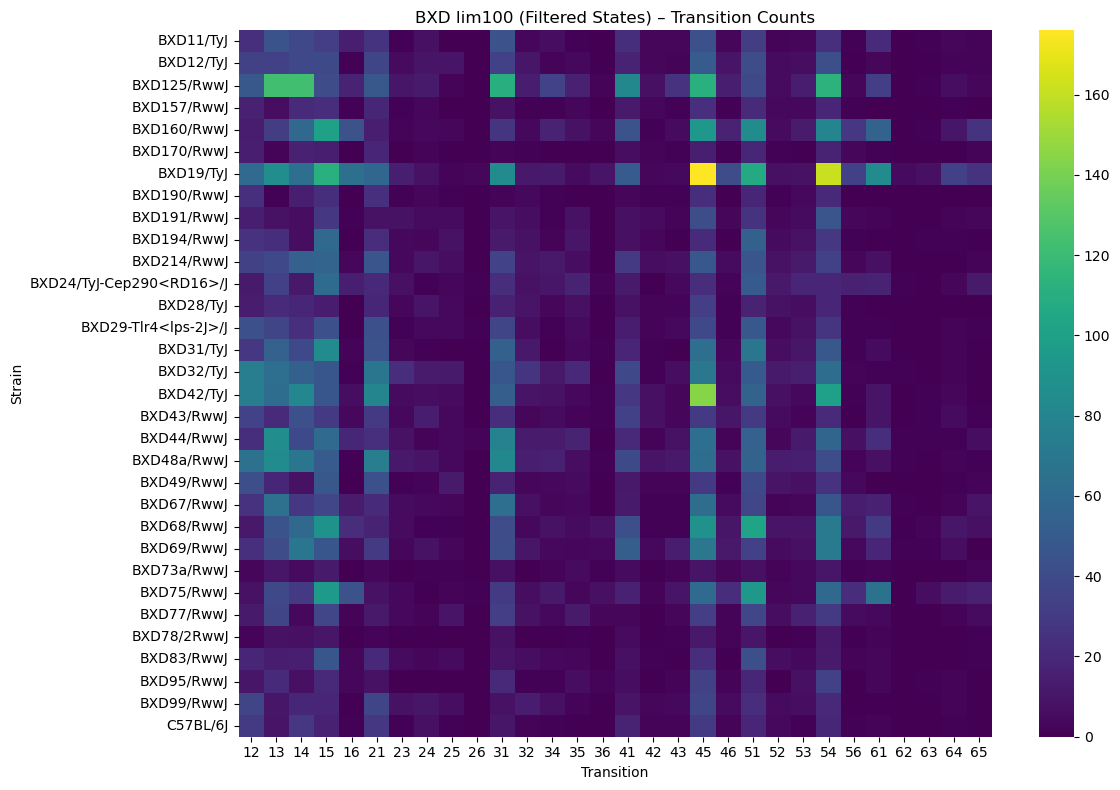

In [70]:
bxd_heatmap_df = bxd_filt_count_df.pivot(index='strain', columns='target', values='count').fillna(0)
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    bxd_heatmap_df,
    cmap='viridis',
    #linewidths=0.5,
    #linecolor='white'
)

ax.set_xlabel('Transition')
ax.set_ylabel('Strain')
ax.set_title('BXD lim100 (Filtered States) – Transition Counts')

plt.tight_layout()
plt.show()

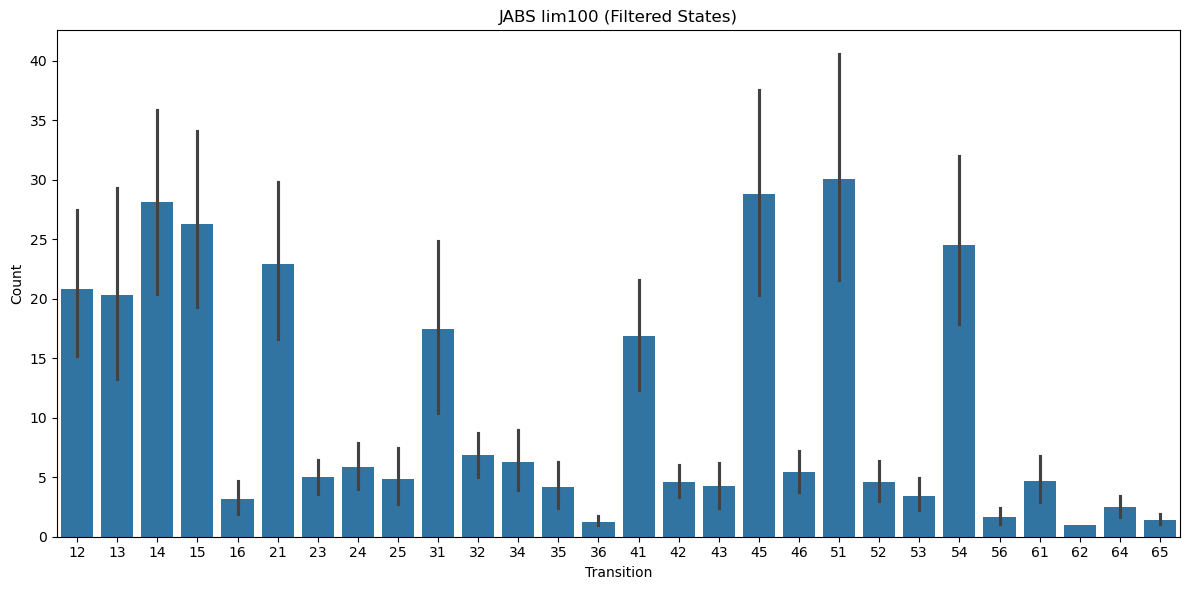

In [80]:
plt.figure(figsize=(12, 6))

jabs_filt_count_df = (JABS100_fulltran_filt.groupby(['target', 'strain'], observed=True).size().reset_index(name='count'))

ax = sns.barplot(data=jabs_filt_count_df, x='target', y='count')

plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('JABS lim100 (Filtered States)')

#plt.yticks(np.arange(0, 150, 10))

plt.tight_layout()
plt.show()

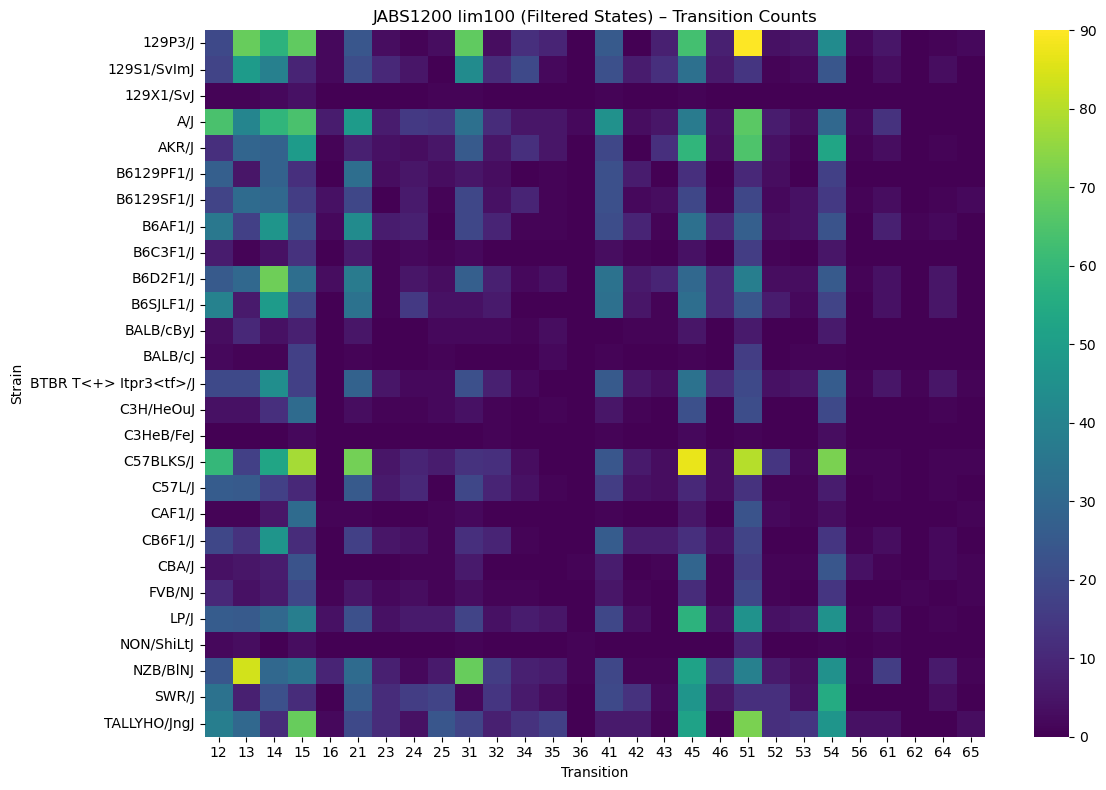

In [72]:
jabs_heatmap_df = jabs_filt_count_df.pivot(index='strain', columns='target', values='count').fillna(0)
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    jabs_heatmap_df,
    cmap='viridis',
    #linewidths=0.5,
    #linecolor='white'
)

ax.set_xlabel('Transition')
ax.set_ylabel('Strain')
ax.set_title('JABS1200 lim100 (Filtered States) – Transition Counts')

plt.tight_layout()
plt.show()

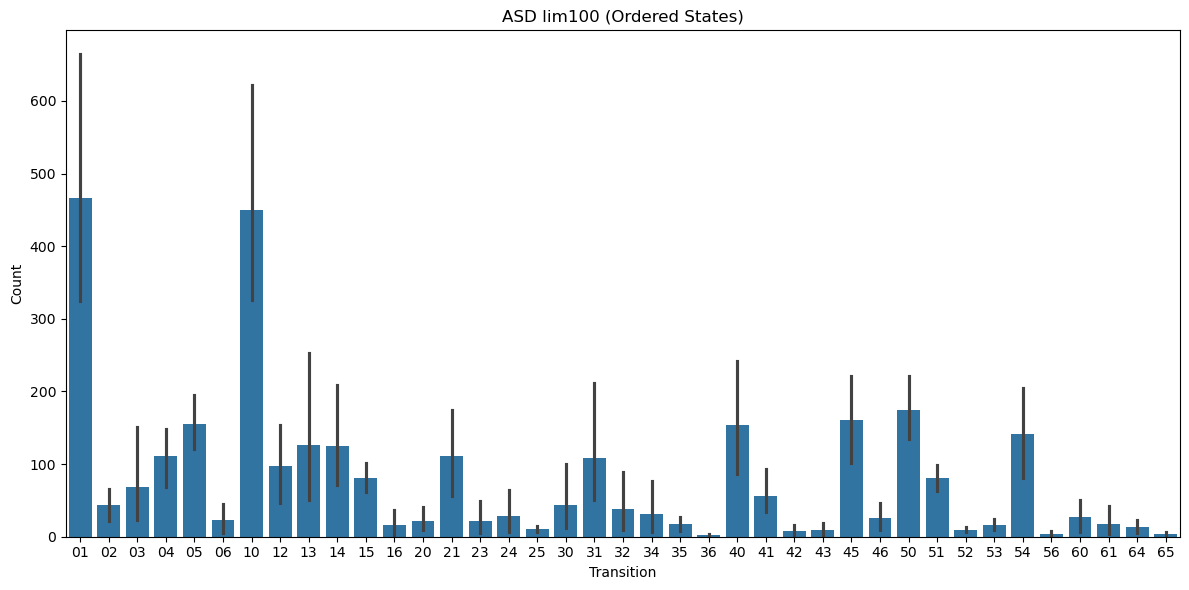

In [73]:
plt.figure(figsize=(12, 6))

asd_ord_count_df = (ASD100_fulltran_ord.groupby(['target', 'strain'], observed=True).size().reset_index(name='count'))

ax = sns.barplot(data=asd_ord_count_df, x='target', y='count')

plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('ASD lim100 (Ordered States)')

#plt.yticks(np.arange(0, 150, 10))

plt.tight_layout()
plt.show()

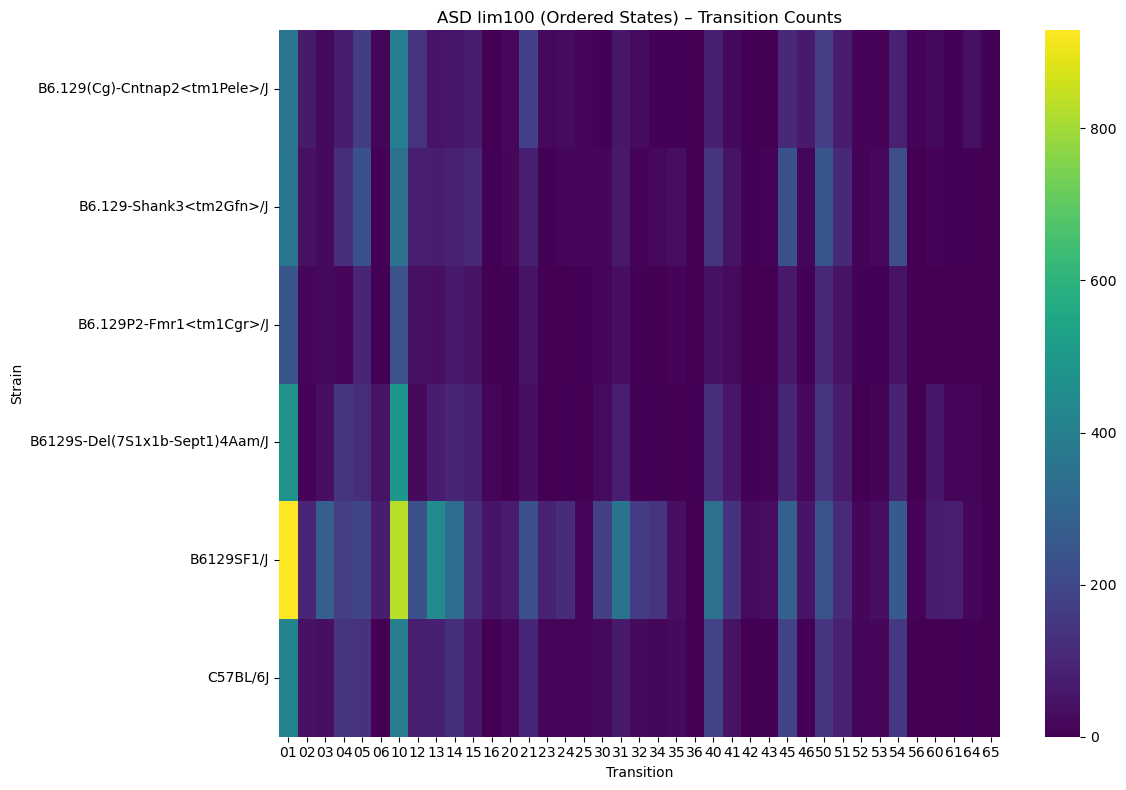

In [74]:
asd_heatmap_df = asd_ord_count_df.pivot(index='strain', columns='target', values='count').fillna(0)
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    asd_heatmap_df,
    cmap='viridis',
    #linewidths=0.5,
    #linecolor='white'
)

ax.set_xlabel('Transition')
ax.set_ylabel('Strain')
ax.set_title('ASD lim100 (Ordered States) – Transition Counts')

plt.tight_layout()
plt.show()

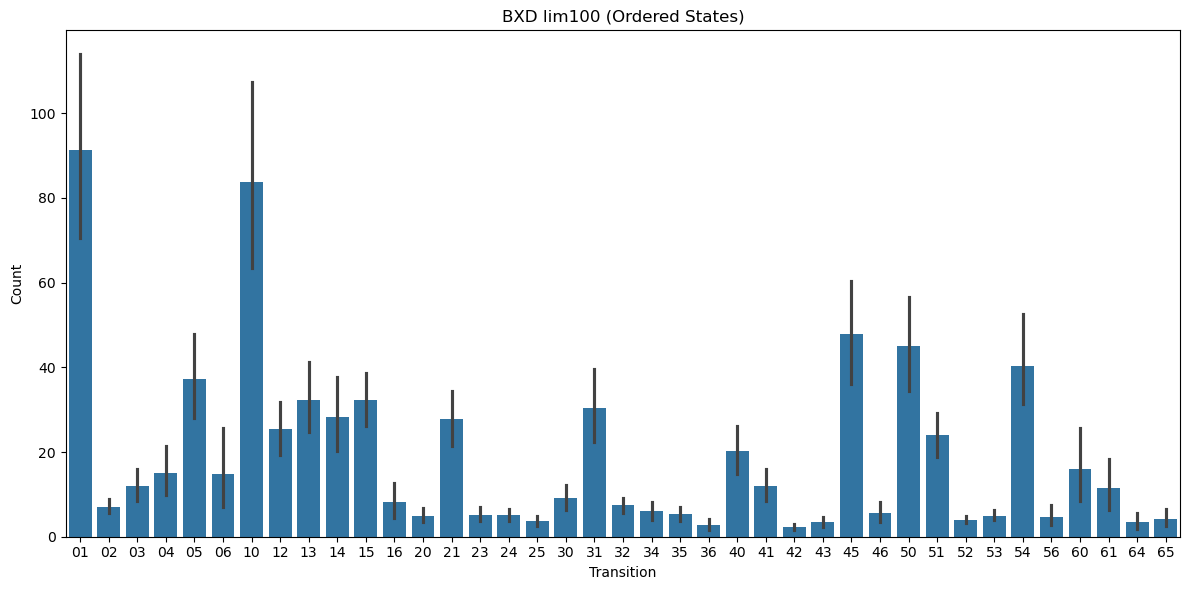

In [75]:
plt.figure(figsize=(12, 6))

bxd_ord_count_df = (BXD100_fulltran_ord.groupby(['target', 'strain'], observed=True).size().reset_index(name='count'))

ax = sns.barplot(data=bxd_ord_count_df, x='target', y='count')

plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('BXD lim100 (Ordered States)')

#plt.yticks(np.arange(0, 150, 10))

plt.tight_layout()
plt.show()

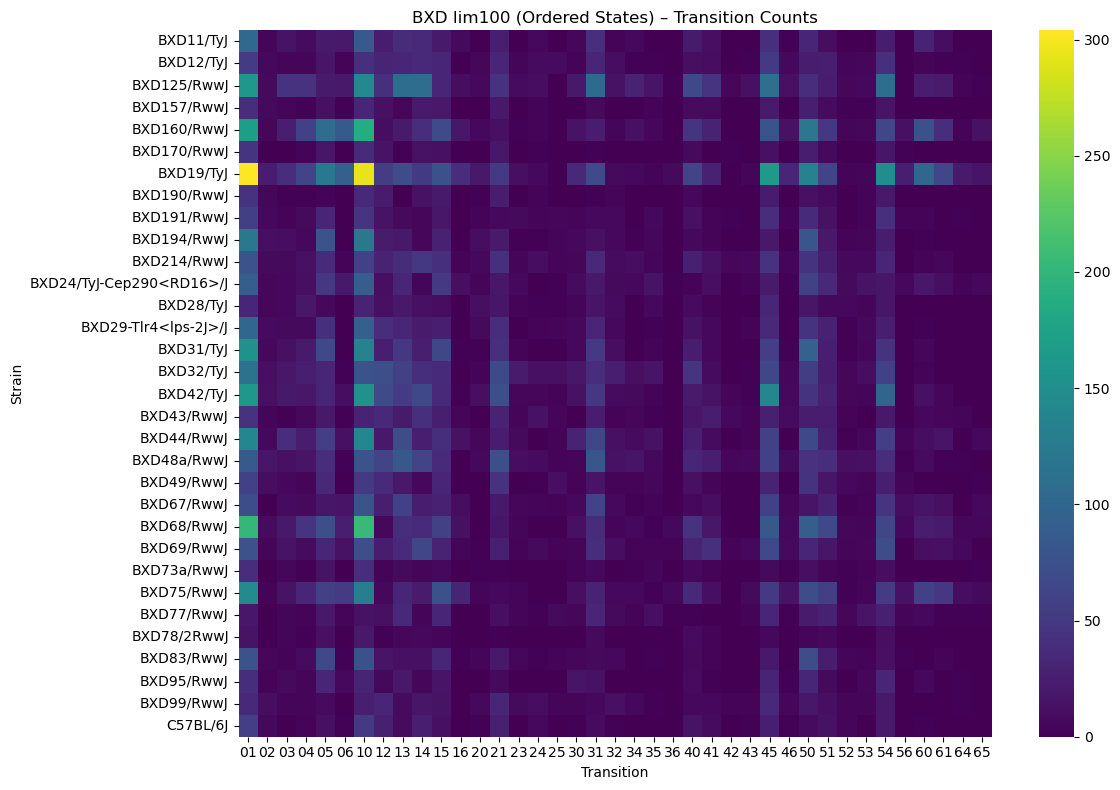

In [76]:
bxd_heatmap_df = bxd_ord_count_df.pivot(index='strain', columns='target', values='count').fillna(0)
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    bxd_heatmap_df,
    cmap='viridis',
    #linewidths=0.5,
    #linecolor='white'
)

ax.set_xlabel('Transition')
ax.set_ylabel('Strain')
ax.set_title('BXD lim100 (Ordered States) – Transition Counts')

plt.tight_layout()
plt.show()

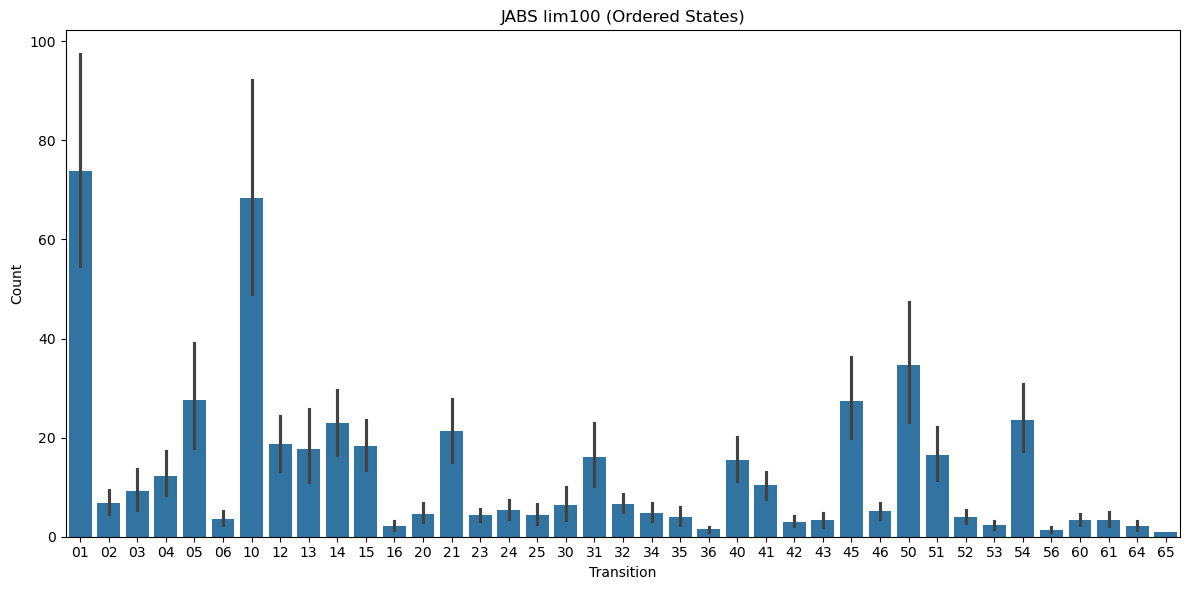

In [77]:
plt.figure(figsize=(12, 6))

jabs_ord_count_df = (JABS100_fulltran_ord.groupby(['target', 'strain'], observed=True).size().reset_index(name='count'))

ax = sns.barplot(data=jabs_ord_count_df, x='target', y='count')

plt.ylabel('Count')
plt.xlabel('Transition')
plt.title('JABS lim100 (Ordered States)')

#plt.yticks(np.arange(0, 150, 10))

plt.tight_layout()
plt.show()

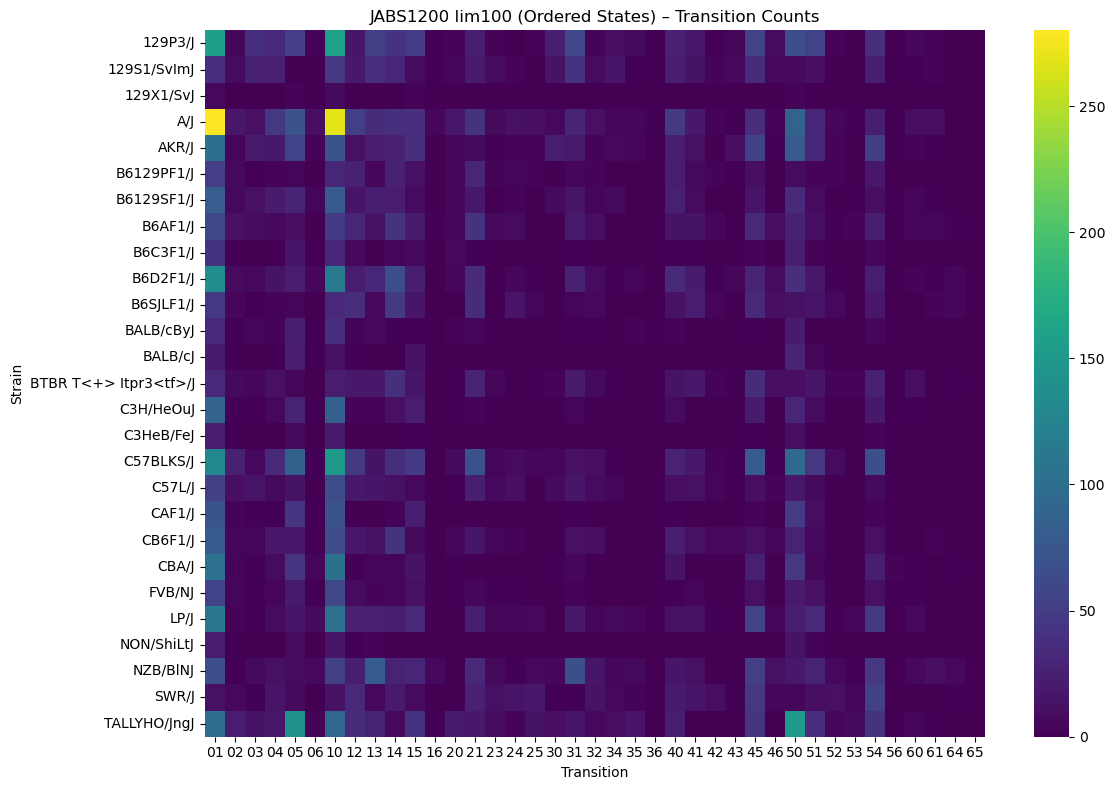

In [78]:
jabs_heatmap_df = jabs_ord_count_df.pivot(index='strain', columns='target', values='count').fillna(0)
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    jabs_heatmap_df,
    cmap='viridis',
    #linewidths=0.5,
    #linecolor='white'
)

ax.set_xlabel('Transition')
ax.set_ylabel('Strain')
ax.set_title('JABS1200 lim100 (Ordered States) – Transition Counts')

plt.tight_layout()
plt.show()

***Duration Distribution Analysis***

In [18]:
asd100_filt = pd.read_parquet(PARQsearchLogCuratin.fpaths['ASD100_fulltran_filt'], engine='fastparquet')
bxd100_filt = pd.read_parquet(PARQsearchLogCuratin.fpaths['BXD100_fulltran_filt'], engine='fastparquet')
jab100_filt = pd.read_parquet(PARQsearchLogCuratin.fpaths['JABS100_fulltran_filt'], engine='fastparquet')

asd100_ord = pd.read_parquet(PARQsearchLogCuratin.fpaths['ASD100_fulltran_ord'], engine='fastparquet')
bxd100_ord = pd.read_parquet(PARQsearchLogCuratin.fpaths['BXD100_fulltran_ord'], engine='fastparquet')
jab100_ord = pd.read_parquet(PARQsearchLogCuratin.fpaths['JABS100_fulltran_ord'], engine='fastparquet')

In [19]:
lim100_parq = [asd100_filt, bxd100_filt, jab100_filt, asd100_ord, bxd100_ord, jab100_ord]

In [20]:
print(asd100_filt.dtypes)
asd100_filt.head()

target                 object
match_num               int64
match_interval         object
bout_num                int64
bout_interval          object
match_pos             float64
bout_pos              float64
duration               object
sex                    object
strain                 object
video_search_index      int64
video_name             object
dtype: object


,target,match_num,match_interval,bout_num,bout_interval,match_pos,bout_pos,duration,sex,strain,video_search_index,video_name
0,12,1,"[4739, 4981]",1,"[4739, 4981]",0.043819,0.043819,"[239, 3]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
1,12,2,"[8216, 8239]",4,"[7938, 8481]",0.075969,0.073398,"[9, 14]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
2,12,3,"[20335, 20393]",11,"[19868, 20728]",0.188026,0.183708,"[43, 15]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
3,12,4,"[25332, 25402]",13,"[24608, 28162]",0.234230,0.227536,"[21, 41, 8]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...
4,12,5,"[25680, 25718]",13,"[24608, 28162]",0.237448,0.227536,"[19, 19]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...


In [173]:
#print(len(asd100_filt['bout_interval']==len(asd100_filt['bout_interval'].unique())))
len(asd100_filt['bout_interval'])

10652

### Need to factor transition
### Fix plots to use bout string data

use boutstr machine

# ASD 100

In [14]:
asd100_boutstr_mac = BoutStringMachine(groomFileCurtain.fpaths['ASD_boutstr'], 100, False)
bxd100_boutstr_mac = BoutStringMachine(groomFileCurtain.fpaths['BXD_boutstr'], 100, False)
jab100_boutstr_mac = BoutStringMachine(groomFileCurtain.fpaths['JAB_boutstr'], 100, False)

In [15]:
asd100_str_diff = asd100_boutstr_mac.get_bout_length_df(['Strain', 'Sex', 'Bout'])
bxd100_str_diff = bxd100_boutstr_mac.get_bout_length_df(['Strain', 'Sex', 'Bout'])
jab100_str_diff = jab100_boutstr_mac.get_bout_length_df(['Strain', 'Sex', 'Bout'])

In [16]:
asd100_str_diff.head()

,Strain,Sex,Bout,NetworkFilename,bout_str,bout_length
0,B6129SF1/J,M,0,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,00000000000000000000000000000000000000000,41
1,B6129SF1/J,M,0,LL1-B2B/2016-05-19_SPD/LL1-2_101043-M-AX4-13-4...,0000000000000000000000000000000000000000000000...,54
2,B6129SF1/J,M,0,LL1-B2B/2016-05-19_SPD/LL1-3_101043-M-AX4-13-4...,00000000000000000000000000000000,32
3,B6129SF1/J,M,0,LL1-B2B/2016-05-19_SPD/LL1-4_101043-M-AX4-13-4...,0000000000000000000000000000000000000000000000,46
4,C57BL/6J,M,0,LL1-B2B/2016-11-10_SPD/LL1-4_B6J_Male_S6927683...,000000000000000000000000000000000000000000,42


In [66]:
# bout length by sex

#bout_lens = ASD100_fulltran_filt['bout_interval'].iloc[1] - ASD100_fulltran_filt['bout_interval'].iloc[0]

bout_interval = asd100_filt['bout_interval']

print(type(bout_interval))
print(bout_interval.array.shape)
print(asd100_filt['strain'].unique().shape[0])
print(np.max(asd100_filt['bout_pos']))

asd_arr = np.vstack(bout_interval.values)   # shape (1052, 2)
asd_diff = asd_arr[:, 1] - asd_arr[:, 0]
asd_diff = pd.Series(asd_arr[:, 1] - asd_arr[:, 0])#, index=bout_interval.index)
asd_diff.name = 'bout_length'

#asd_diff = pd.concat([asd100_filt[['strain', 'target', 'match_pos', 'bout_pos', 'sex']], asd_diff], axis=1)
asd_diff = pd.concat([asd100_filt, asd_diff], axis=1)

#print(len(asd_diff['bout_length'].unique()))
asd_diff.head()

#print(bout_interval[0][0])

<class 'pandas.core.series.Series'>
(10652,)
6
0.9995931576514101


,target,match_num,match_interval,bout_num,bout_interval,match_pos,bout_pos,duration,sex,strain,video_search_index,video_name,bout_length
0,12,1,"[4739, 4981]",1,"[4739, 4981]",0.043819,0.043819,"[239, 3]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...,242
1,12,2,"[8216, 8239]",4,"[7938, 8481]",0.075969,0.073398,"[9, 14]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...,543
2,12,3,"[20335, 20393]",11,"[19868, 20728]",0.188026,0.183708,"[43, 15]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...,860
3,12,4,"[25332, 25402]",13,"[24608, 28162]",0.234230,0.227536,"[21, 41, 8]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...,3554
4,12,5,"[25680, 25718]",13,"[24608, 28162]",0.237448,0.227536,"[19, 19]",M,B6129SF1/J,0,asd/projects/kumar-lab/open-field-datasets/aut...,3554


In [9]:
#plt.figure(figsize=(12, 6))
#sns.scatterplot(data=asd100_diff, x="strain", y="bout_length", hue="sex")

<Figure size 1200x600 with 0 Axes>

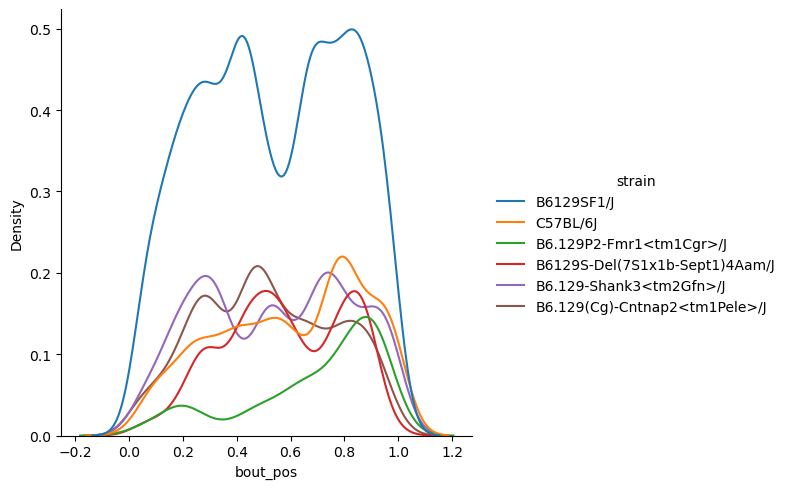

In [67]:
plt.figure(figsize=(12, 6))
sns.displot(data=asd_diff, x="bout_pos", hue="strain", kind="kde")

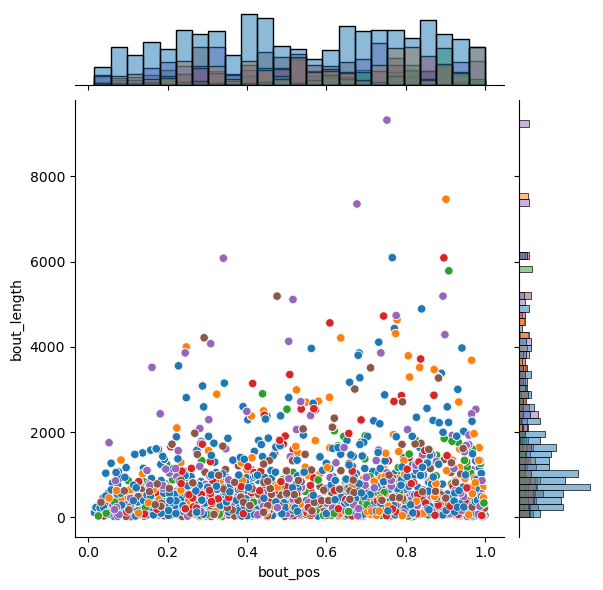

In [68]:
g = sns.JointGrid(data=asd_diff, x="bout_pos", y="bout_length", hue="strain")
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.get_legend().remove()

<Axes: xlabel='bout_pos', ylabel='strain'>

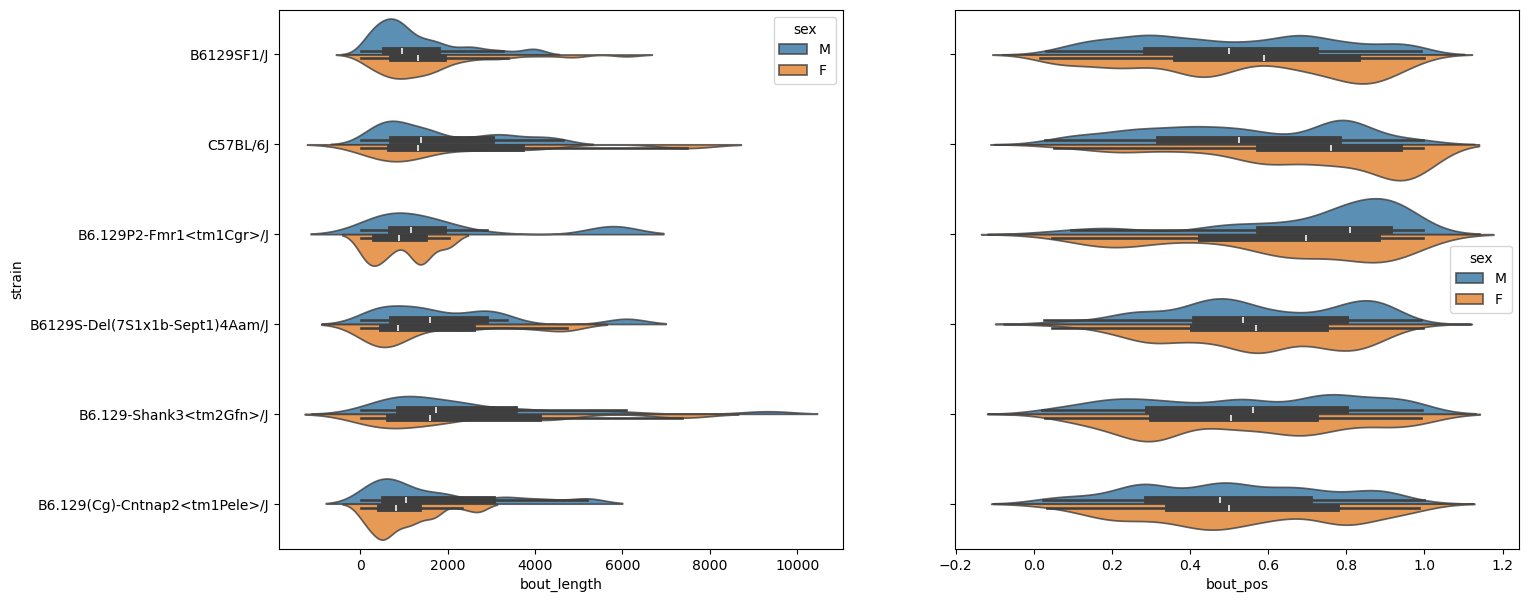

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)
sns.violinplot(data=asd_diff, x="bout_length", y="strain", hue="sex", split=True, alpha=0.8, ax=axes[0])
sns.violinplot(data=asd_diff, x="bout_pos", y="strain", hue="sex", split=True, alpha=0.8, ax=axes[1])

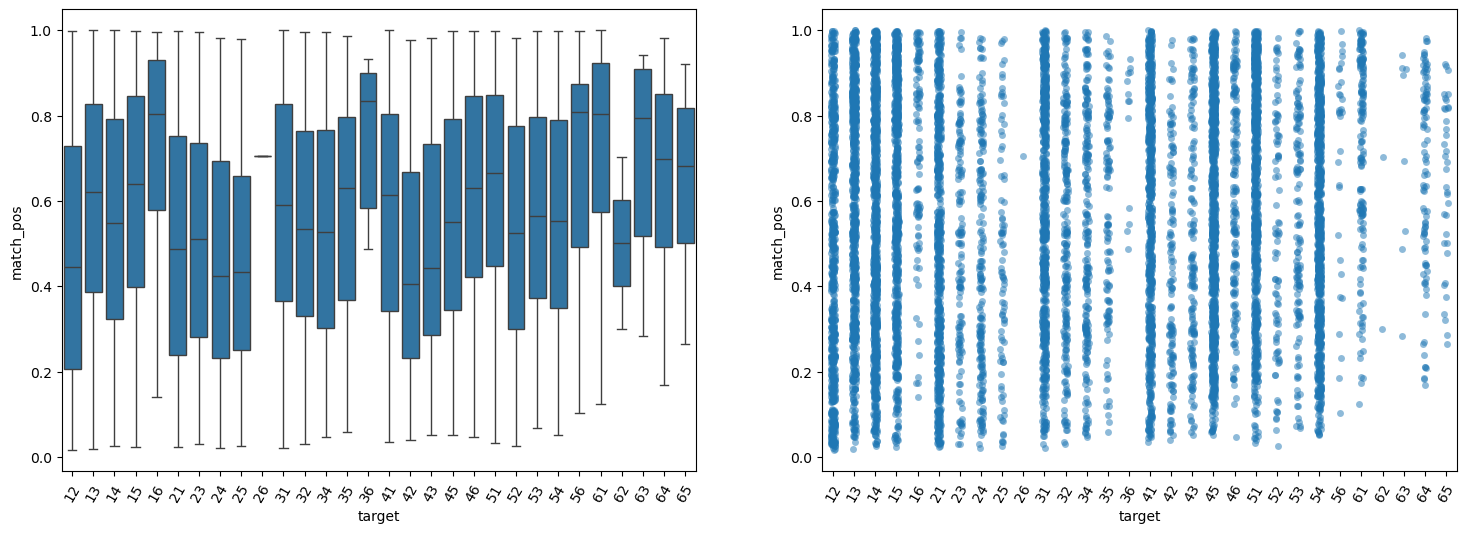

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)
sns.boxplot(data=asd_diff, x="target", y="match_pos", ax=axes[0])
sns.stripplot(data=asd_diff, x="target", y="match_pos", ax=axes[1], alpha=0.5)

for ax in axes:
    ax.tick_params(axis='x', rotation=60)

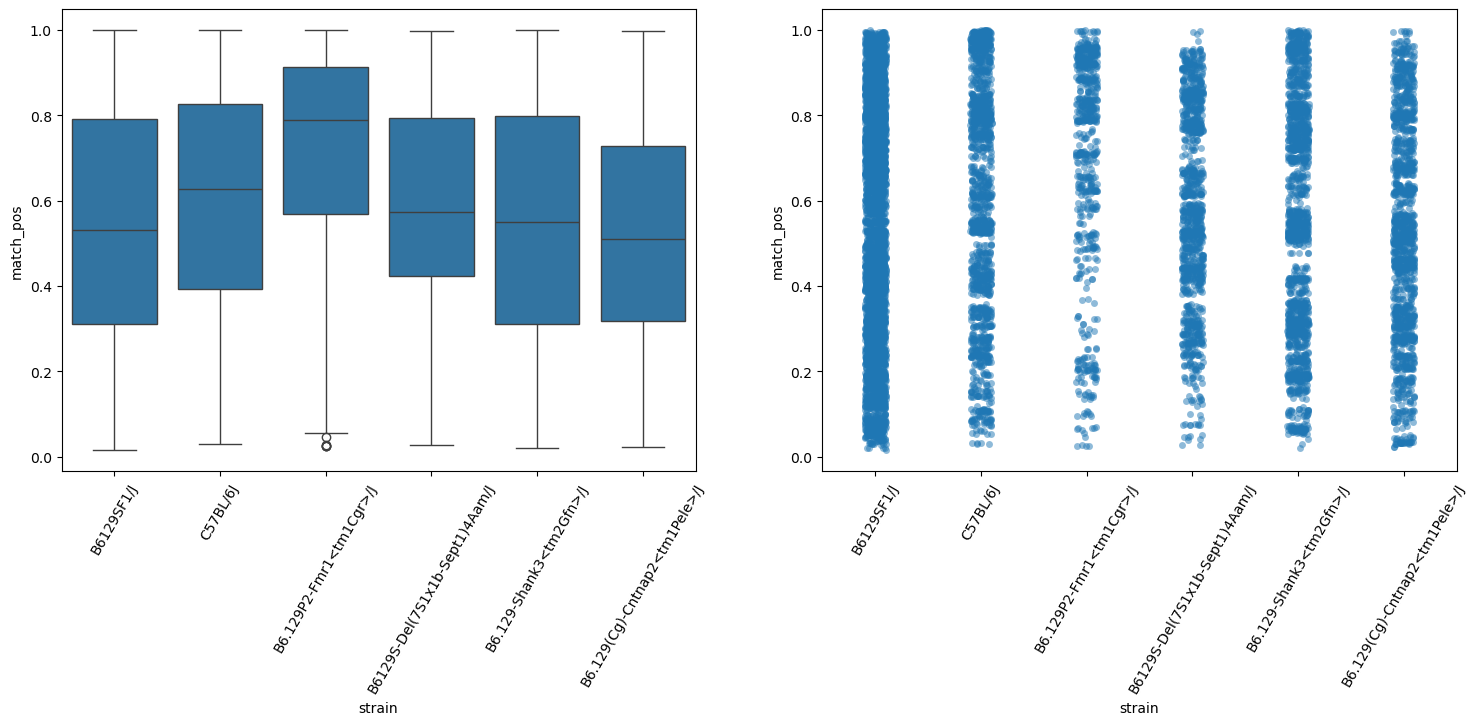

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)
sns.boxplot(data=asd_diff, x="strain", y="match_pos", ax=axes[0])
sns.stripplot(data=asd_diff, x="strain", y="match_pos", ax=axes[1], alpha=0.5)

for ax in axes:
    ax.tick_params(axis='x', rotation=60)


# BXD 100

In [81]:
bout_interval = bxd100_filt['bout_interval']

print(type(bout_interval))
print(bout_interval.array.shape)
print(bxd100_filt['strain'].unique().shape[0])
print(np.max(bxd100_filt['bout_pos']))

bxd_arr = np.vstack(bout_interval.values)   # shape (1052, 2)
bxd_diff = bxd_arr[:, 1] - bxd_arr[:, 0]
bxd_diff = pd.Series(bxd_arr[:, 1] - bxd_arr[:, 0])#, index=bout_interval.index)
bxd_diff.name = 'bout_length'

#bxd_diff = pd.concat([bxd100_filt[['target', 'strain', 'bout_pos', 'sex']], bxd_diff], axis=1)
bxd_diff = pd.concat([bxd100_filt, bxd_diff], axis=1)

bxd_diff.head()

<class 'pandas.core.series.Series'>
(14791,)
32
0.9975


,target,match_num,match_interval,bout_num,bout_interval,match_pos,bout_pos,duration,sex,strain,video_search_index,video_name,bout_length
0,12,1,"[34512, 34550]",23,"[34424, 35281]",0.319556,0.318741,"[21, 17]",M,BXD194/RwwJ,0,/projects/kumar-lab/bxd-survey-dataset/unalign...,857
1,12,2,"[38057, 38179]",26,"[38057, 38179]",0.352380,0.352380,"[53, 52, 17]",M,BXD194/RwwJ,0,/projects/kumar-lab/bxd-survey-dataset/unalign...,122
2,12,3,"[46612, 46759]",27,"[46612, 47781]",0.431593,0.431593,"[138, 9]",M,BXD194/RwwJ,0,/projects/kumar-lab/bxd-survey-dataset/unalign...,1169
3,12,4,"[47185, 47204]",27,"[46612, 47781]",0.436898,0.431593,"[8, 11]",M,BXD194/RwwJ,0,/projects/kumar-lab/bxd-survey-dataset/unalign...,1169
4,12,5,"[59846, 60015]",33,"[59170, 60156]",0.554130,0.547870,"[140, 29]",M,BXD194/RwwJ,0,/projects/kumar-lab/bxd-survey-dataset/unalign...,986


In [82]:
#plt.figure(figsize=(12, 6))
#sns.scatterplot(data=bxd_diff, x="bout_pos", y="bout_length", hue="strain")

<Figure size 1200x600 with 0 Axes>

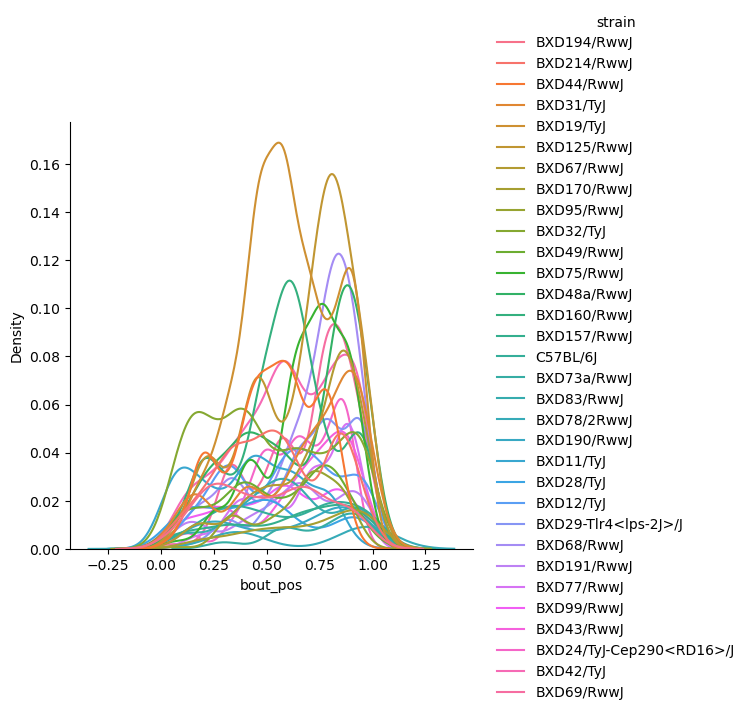

In [83]:
plt.figure(figsize=(12, 6))
sns.displot(data=bxd_diff, x="bout_pos", hue="strain", kind="kde")

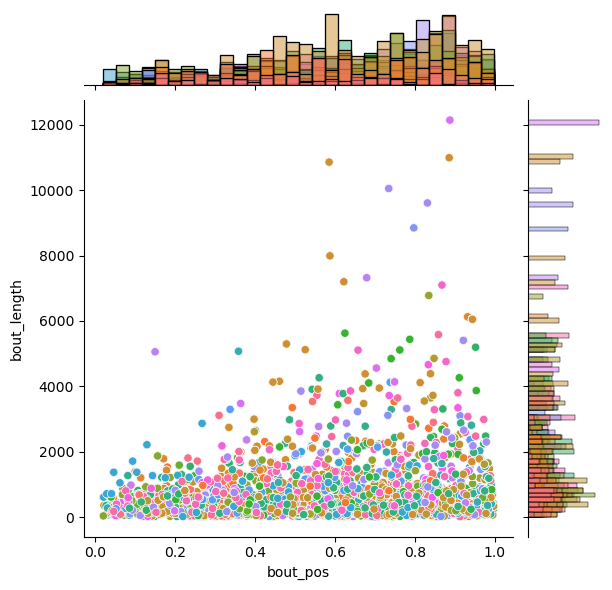

In [84]:
g = sns.JointGrid(data=bxd_diff, x="bout_pos", y="bout_length", hue="strain")
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.get_legend().remove()

In [89]:
#fig, axes = plt.subplots(1, 2, figsize=(20, 25), sharey=True)
#sns.violinplot(data=bxd_diff, x="bout_length", y="strain", hue="sex", split=True, alpha=0.8, ax=axes[0])
#sns.violinplot(data=bxd_diff, x="bout_pos", y="strain", hue="sex", split=True, alpha=0.8, ax=axes[1])

#g = sns.catplot(data=bxd_diff, x="strain", y="bout_pos", hue="sex", kind="violin", split=True, height=10, aspect=2.0, alpha=0.8)
#g.set_xticklabels(rotation=45)

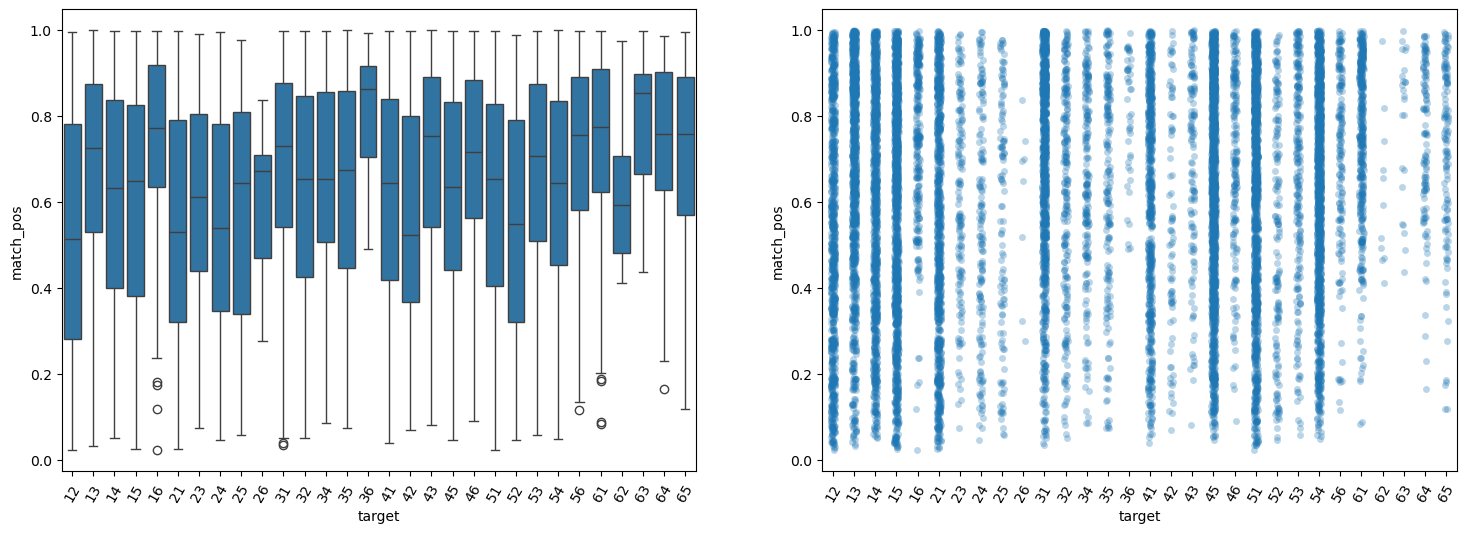

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)
sns.boxplot(data=bxd_diff, x="target", y="match_pos", ax=axes[0])
sns.stripplot(data=bxd_diff, x="target", y="match_pos", ax=axes[1], alpha=0.3)

for ax in axes:
    ax.tick_params(axis='x', rotation=60)

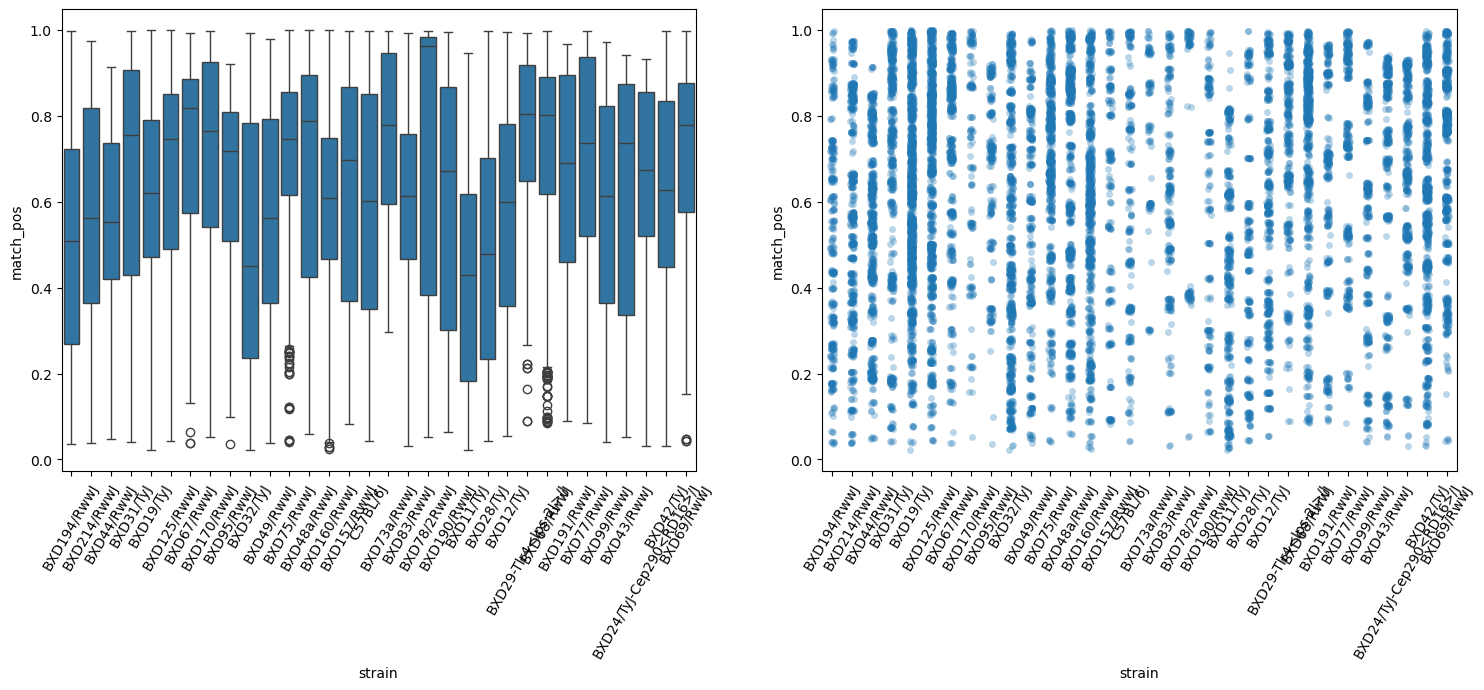

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)
sns.boxplot(data=bxd_diff, x="strain", y="match_pos", ax=axes[0])
sns.stripplot(data=bxd_diff, x="strain", y="match_pos", ax=axes[1], alpha=0.3)

for ax in axes:
    ax.tick_params(axis='x', rotation=60)

In [95]:
#plt.figure(figsize=(25, 10))
#g = sns.boxplot(data=bxd_diff, y='bout_length', x='strain', hue='sex', flierprops={"marker": "x"},)
#g.tick_params(axis='x', rotation=80)

# JABS1200 100

In [96]:
bout_interval = jab100_filt['bout_interval']

print(type(bout_interval))
print(bout_interval.array.shape)
print(jab100_filt['strain'].unique().shape[0])
print(np.max(jab100_filt['bout_pos']))

jab_arr = np.vstack(bout_interval.values)   # shape (1052, 2)
jab_diff = jab_arr[:, 1] - jab_arr[:, 0]
jab_diff = pd.Series(jab_arr[:, 1] - jab_arr[:, 0])#, index=bout_interval.index)
jab_diff.name = 'bout_length'

#jab_diff = pd.concat([jab100_filt[['strain', 'bout_pos', 'sex']], jab_diff], axis=1)
jab_diff = pd.concat([jab100_filt, jab_diff], axis=1)

jab_diff.head()

<class 'pandas.core.series.Series'>
(7292,)
27
0.9988703983862834


,target,match_num,match_interval,bout_num,bout_interval,match_pos,bout_pos,duration,sex,strain,video_search_index,video_name,bout_length
0,12,1,"[19705, 19801]",3,"[19705, 20020]",0.198739,0.198739,"[84, 12]",M,BALB/cJ,0,/projects/kumar-lab/strain-survey-dataset/LL1-...,315
1,12,1,"[80707, 80858]",15,"[80707, 80944]",0.813989,0.813989,"[72, 70, 9]",F,A/J,1,/projects/kumar-lab/strain-survey-dataset/LL1-...,237
2,12,1,"[15590, 15664]",6,"[14768, 16062]",0.157237,0.148946,"[64, 10]",F,A/J,2,/projects/kumar-lab/strain-survey-dataset/LL1-...,1294
3,12,2,"[15664, 15691]",6,"[14768, 16062]",0.157983,0.148946,"[9, 18]",F,A/J,2,/projects/kumar-lab/strain-survey-dataset/LL1-...,1294
4,12,3,"[18450, 18689]",9,"[18450, 18689]",0.186082,0.186082,"[108, 66, 53, 12]",F,A/J,2,/projects/kumar-lab/strain-survey-dataset/LL1-...,239


In [98]:
#plt.figure(figsize=(12, 6))
#sns.scatterplot(data=jab_diff, x="bout_pos", y="bout_length", hue="strain")

<Figure size 1200x600 with 0 Axes>

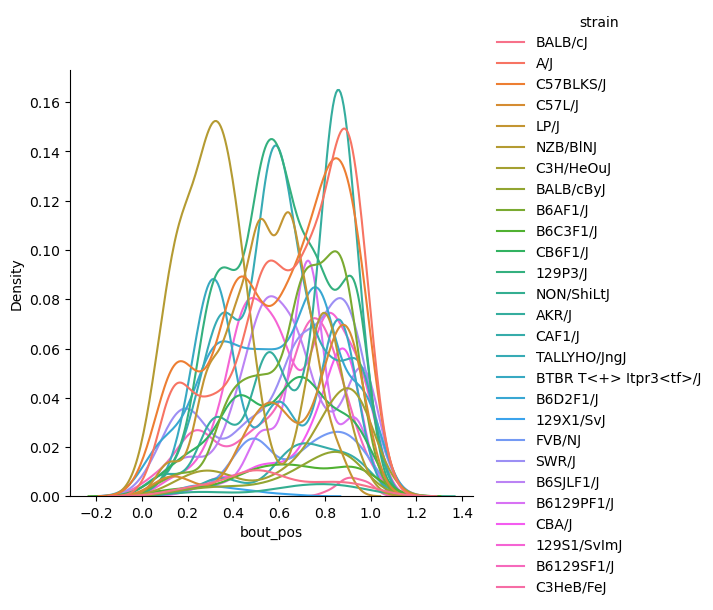

In [99]:
plt.figure(figsize=(12, 6))
sns.displot(data=jab_diff, x="bout_pos", hue="strain", kind="kde")

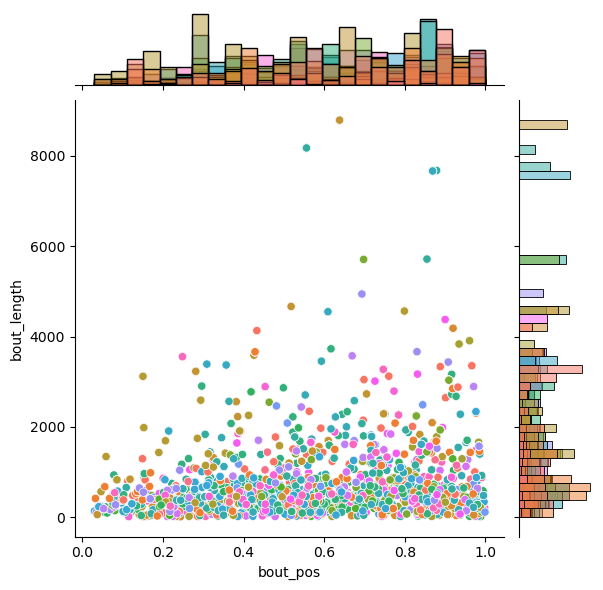

In [100]:
g = sns.JointGrid(data=jab_diff, x="bout_pos", y="bout_length", hue="strain")
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.get_legend().remove()

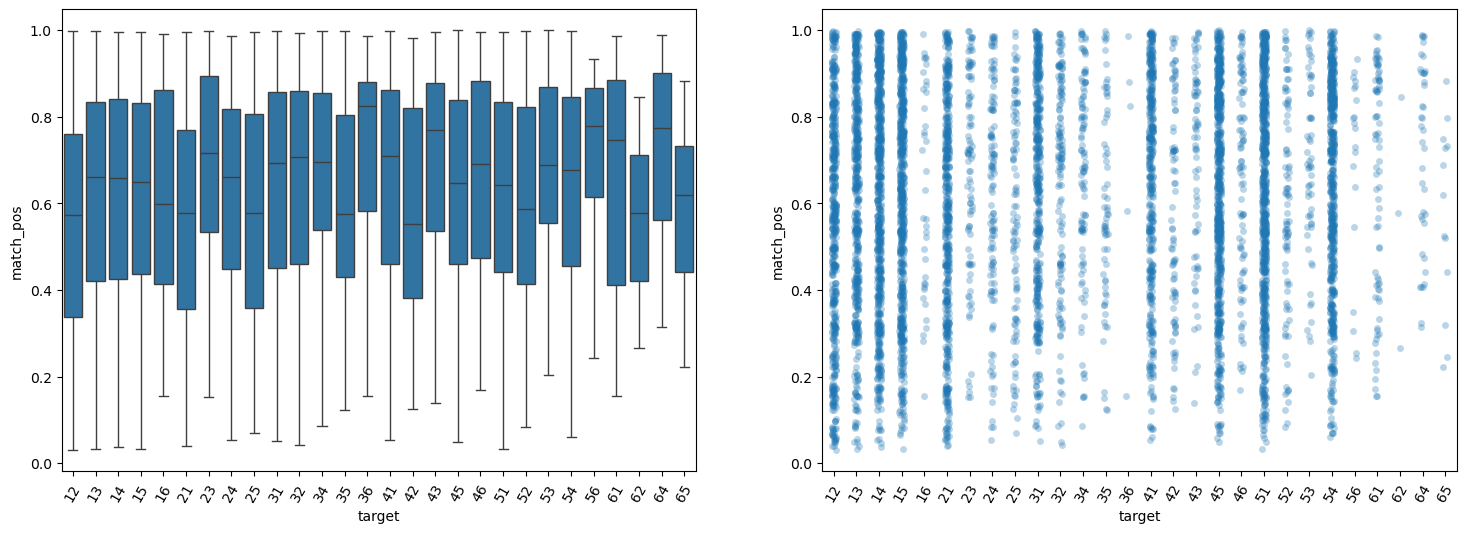

In [101]:
#plt.figure(figsize=(25, 10))
#g = sns.boxplot(data=jab_diff, y='bout_pos', x='strain', hue='sex', flierprops={"marker": "x"},)
#g.tick_params(axis='x', rotation=80)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)
sns.boxplot(data=jab_diff, x="target", y="match_pos", ax=axes[0])
sns.stripplot(data=jab_diff, x="target", y="match_pos", ax=axes[1], alpha=0.3)

for ax in axes:
    ax.tick_params(axis='x', rotation=60)

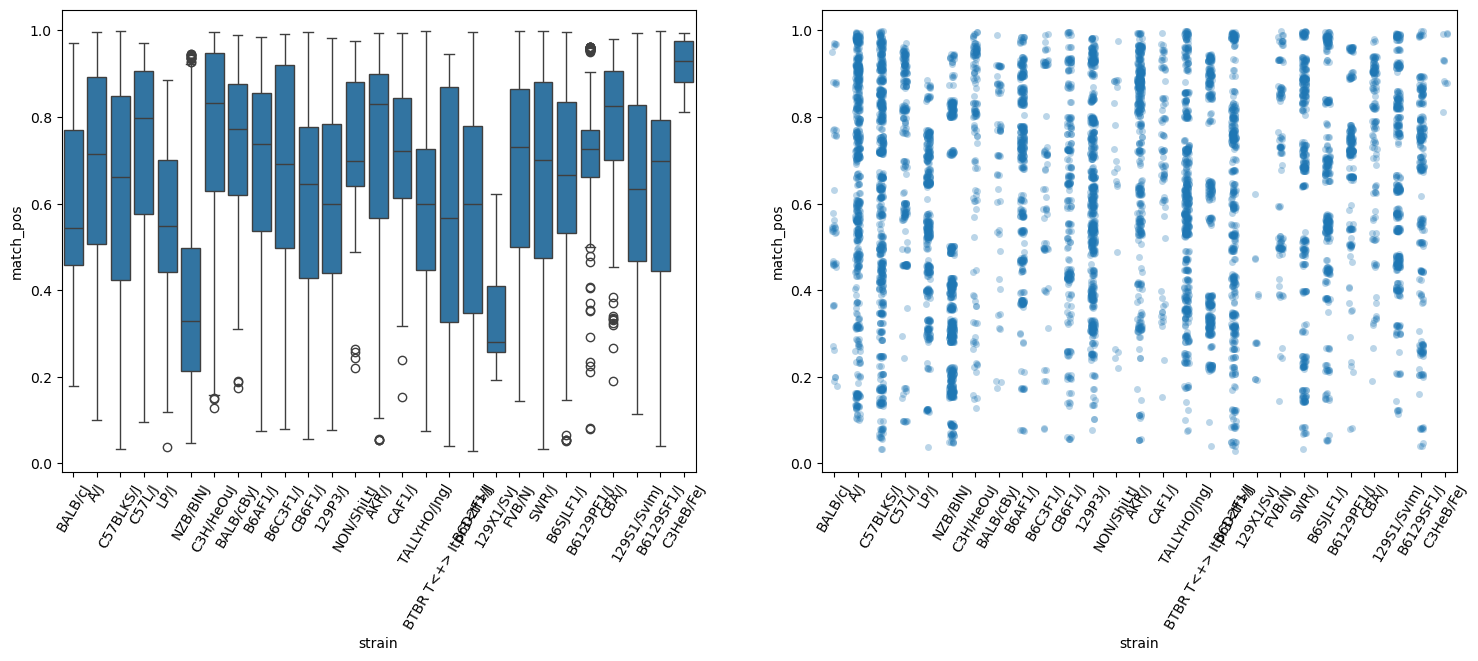

In [102]:
#plt.figure(figsize=(25, 10))
#g = sns.boxplot(data=jab_diff, y='bout_length', x='strain', hue='sex', flierprops={"marker": "x"},)
#g.tick_params(axis='x', rotation=80)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)
sns.boxplot(data=jab_diff, x="strain", y="match_pos", ax=axes[0])
sns.stripplot(data=jab_diff, x="strain", y="match_pos", ax=axes[1], alpha=0.3)

for ax in axes:
    ax.tick_params(axis='x', rotation=60)

# Duration averages by state

In [103]:
asd_origin = pd.read_csv(groomFileCurtain.fpaths['ASD_bouts'])
names = list(asd_origin['NetworkFilename'].unique())
names = names[:100]

asd100_origin = asd_origin[asd_origin['NetworkFilename'].isin(names)]
asd100_origin.head()

,Start,Duration,State,Video_name,NetworkFilename,Strain,Sex,End,Syntax,Ordered_State,Bout,Filtered_State
0,0,4739,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4739,Not_Grooming,0,0,0
1,4739,239,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4978,Paw_Lick,1,1,1
2,4978,3,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4981,Bilateral_Face_Wash,2,1,2
3,4981,1179,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,6160,Not_Grooming,0,0,0
4,6160,154,3,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,6314,Genital_Groom,5,2,5


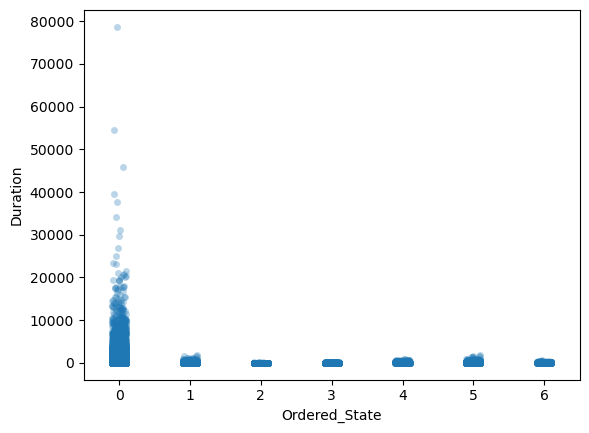

In [135]:
g = sns.stripplot(data=asd100_origin, x='Ordered_State', y='Duration', alpha=0.3)#col='Filtered_State', col_wrap=4, kind='kde')
#for ax in g.axes.flat:
    #ax.set_xticks([0, 0.5, 1])
#    ax.set_xlim(0, 5000)